# <center>Modélisation Algorithmique<br /> Workshop</center>

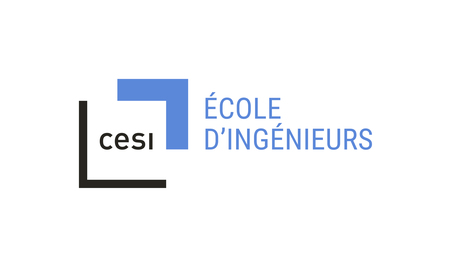


# Introduction

L'objectif est de fournir à l'équipe technique un itinéraire permettant de passer par toutes les rues de la zone, une et une seule fois, en partant de l'intersection de la *rue Smatti* et de la *rue du Général Cohen Boulakia* (noté "Départ" sur le schéma) et en y revenant. Il faut aussi déterminer s'il sera faisable de déterminer un itinéraire du même genre pour une carte plus grande, et à quel prix.

Mais avant de travailler sur cette carte, reprenons le problème des **7 ponts de Königsberg**. Comment résoudre ce problème de la même manière que celui de la zone A ?

**Le problème des 7 ponts de Königsberg est le suivant: Est-il possible de passer une et une seule fois par tous les ponts et avec un point de départ choisi et en revenant à ce point de départ.**

![](img/konigsberg/ponts.jpg)

**Les zones de la ville sont les sommets et les ponts sont des arêtes. Le but est de trouver un chemin passant par toutes les arêtes, c'est donc un problème eulérien.**

![](img/konigsberg/graphe.png)

Peut-on appliquer cette méthode à la carte qu'Agathe nous a fournie&nbsp;?

**Oui.**

![](img/prosit/plan.png)

![](img/prosit/graphe.png)

# 1. Représentation d'un graphe via une liste d'adjacence

## 1.1 Implémentation de la liste d'adjacence


On sait maintenant construire une représentation par graphes d'un réseau routier, mais on ne peut pas donner ces graphes en entrée du programme sous cette forme sagittale&nbsp;! Nous allons avoir besoin d'implémenter une structure de données. On va représenter en mémoire notre graphe par une [liste d'adjacence](https://fr.wikipedia.org/wiki/Liste_d%27adjacence) en utilisant les [listes](https://docs.python.org/3/tutorial/introduction.html#lists) en Python.

Voyons le principe de la liste d'adjacence sur un exemple:




Mais attention, dans cet exemple, le graphe est orienté. Nous, nous considérons un graphe non orienté. Comment adapter cette représentation&nbsp;?

**Nous devons compter une arête dans les deux sens**

Implémentons la zone A du schéma d'Agathe selon cette structure (en utilisant les tuples plutôt que les listes, vu que nous ne changerons pas leur contenu)&nbsp;:

In [1]:
head_zone_A = (1, 3, 5, 7, 11, 15, 17, 19, 23, 25, 27, 29)
succ_zone_A = (2, 4, 5, 1, 8, 4, 1, 3, 5, 9, 2, 4, 7, 8, 5, 11, 8, 10, 9, 3, 7, 5, 4, 8, 7, 11, 10, 6)

Même chose maintenant avec la liste d'adjacence permettant de représenter le problème des 7 ponts de Königsberg. Initialisez cette liste d'adjacence de manière à ce que `head_7_ponts` représente la liste des têtes de listes et `succ_7_ponts` représente la liste des listes des successeurs.

Les sommets seront numérotés comme suit&nbsp;:
1. _Nord_ sera le sommet `1`
2. _Centre_ sera le sommet `2`
3. _Est_ sera le sommet `3`
4. _Sud_ sera le sommet `4`

Mais on l'a vu, ce graphe est un peu particulier. Quelle est cette particularité&nbsp;? Comment représenter ce graphe par liste d'adjacence&nbsp;?

**Il possède plusieurs arêtes entre deux sommets.**

Allons-y pour représenter ce graphe&nbsp;:

In [2]:
head_7_ponts = (1, 4, 9, 12, 15)
succ_7_ponts = (2, 2, 3, 1, 1, 3, 4, 4, 1, 2, 4, 2, 2, 3)

## 1.2 Implémentation des fonctions

Afin de vérifier que les données entrées dans ces listes sont correctes, et pour se faire un peu la main en Python, on va implémenter deux fonctions qui prennent en paramètre un graphe (sous la forme des deux listes représentant la liste d'adjacence) et un sommet (sous la forme de son numéro)&nbsp;:
* la fonction <code class="cm-s-ipython language-python"><span class="cm-def">degreSommetGraphe</span>(<span class="cm-variable">head, succ, sommet</span>)</code> qui renvoie le degré du sommet
* la fonction <code class="cm-s-ipython language-python"><span class="cm-def">voisinsSommetGraphe</span>(<span class="cm-variable">head, succ, sommet</span>)</code> qui renvoie la liste des voisins du sommet

Et on va tester ça sur le graphe de la zone A.



In [3]:
def degreSommetGraphe(head, sommet):
    degre = head[sommet] - head[sommet - 1]
    return degre


def voisinsSommetGraphe(head, succ, sommet):
    liste_voisins = succ[head[sommet - 1] - 1:head[sommet] - 1]
    return liste_voisins


print('Degré des sommets du graphe des 7 ponts de Königsberg')
for sommet in range(1, len(head_7_ponts)):
    print(f'Sommet {sommet}: {degreSommetGraphe(head_7_ponts, sommet)}')

print('\nVoisins des sommets du graphe des 7 ponts de Königsber')
for sommet in range(1, len(head_7_ponts)):
    print(f'Sommet {sommet}: {voisinsSommetGraphe(head_7_ponts, succ_7_ponts, sommet)}')

print('\nDegré des sommets du graphe de la Zone A')
for sommet in range(1, len(head_zone_A)):
    print(f'Sommet {sommet}: {degreSommetGraphe(head_zone_A, sommet)}')

print('\nVoisins des sommets du graphe de la Zone A')
for sommet in range(1, len(head_zone_A)):
    print(f'Sommet {sommet}: {voisinsSommetGraphe(head_zone_A, succ_zone_A, sommet)}')

Degré des sommets du graphe des 7 ponts de Königsberg
Sommet 1: 3
Sommet 2: 5
Sommet 3: 3
Sommet 4: 3

Voisins des sommets du graphe des 7 ponts de Königsber
Sommet 1: (2, 2, 3)
Sommet 2: (1, 1, 3, 4, 4)
Sommet 3: (1, 2, 4)
Sommet 4: (2, 2, 3)

Degré des sommets du graphe de la Zone A
Sommet 1: 2
Sommet 2: 2
Sommet 3: 2
Sommet 4: 4
Sommet 5: 4
Sommet 6: 2
Sommet 7: 2
Sommet 8: 4
Sommet 9: 2
Sommet 10: 2
Sommet 11: 2

Voisins des sommets du graphe de la Zone A
Sommet 1: (2, 4)
Sommet 2: (5, 1)
Sommet 3: (8, 4)
Sommet 4: (1, 3, 5, 9)
Sommet 5: (2, 4, 7, 8)
Sommet 6: (5, 11)
Sommet 7: (8, 10)
Sommet 8: (9, 3, 7, 5)
Sommet 9: (4, 8)
Sommet 10: (7, 11)
Sommet 11: (10, 6)


Cette représentation par liste d'adjacence semble très efficace pour déterminer tous les voisins d'un sommet. Mais est-elle aussi efficace pour tous les traitements qu'on pourrait imaginer sur un graphe&nbsp;? Et si le graphe est orienté&nbsp;?

**Cette méthode est très nulle**

Voyons si on peut corriger ces défauts.

##  1.3 Implémentation Pythonesque

On peut peut-être exploiter un peu mieux le langage Python. Il y a deux aspects sur lesquels on pourrait améliorer notre implémentation de liste d'adjacence. Lesquels&nbsp;?

**La simplicité**

Que proposez-vous comme solution pour ces point&nbsp;?

**Utiliser un dictionnaire**

Implémentez la version que vous voulez, et réimplémentez la fonction d'affichage du degré des sommets. Gardez la version initiale, comme ça on pourra comparer leurs performances&nbsp;!

In [4]:
dict_7_ponts = {1: (2, 2, 3),
                2: (1, 1, 4, 4),
                3: (1, 2, 4),
                4: (2, 2, 3)}

dict_zone_A = {1: {2, 4},
               2: {1, 5},
               3: {4, 8},
               4: {1, 3, 5, 9},
               5: {2, 4, 6, 8},
               6: {5, 11},
               7: {8, 10},
               8: {3, 5, 7, 9},
               9: {4, 8},
               10: {7, 11},
               11: {6, 10}}


def degreSommetGraphe2(liste, sommet):
    degre = len(liste[sommet])
    return degre


print('Degré des sommets du graphe de la Zone A')
for sommet in range(1, len(dict_zone_A) + 1):
    print(f'Sommet {sommet}: {degreSommetGraphe2(dict_zone_A, sommet)}')

print('\nDegré des sommets du graphe des 7 ponts de Königsberg')
for sommet in range(1, len(dict_7_ponts) + 1):
    print(f'Sommet {sommet}: {degreSommetGraphe2(dict_7_ponts, sommet)}')

Degré des sommets du graphe de la Zone A
Sommet 1: 2
Sommet 2: 2
Sommet 3: 2
Sommet 4: 4
Sommet 5: 4
Sommet 6: 2
Sommet 7: 2
Sommet 8: 4
Sommet 9: 2
Sommet 10: 2
Sommet 11: 2

Degré des sommets du graphe des 7 ponts de Königsberg
Sommet 1: 3
Sommet 2: 4
Sommet 3: 3
Sommet 4: 3


Pour la liste des voisins des sommets, c'est encore plus direct, même plus besoin d'écrire une fonction, un simple <code class="cm-s-ipython language-python"><span class="cm-builtin">print</span>(<span class="cm-variable">graphe</span>)</code> suffit&nbsp;! Mais est-ce que ça fonctionne avec le problème des 7 ponts de Königsberg&nbsp;?

**Oui**

Et en terme de performances&nbsp;? On va mesurer le temps de calcul, avec la commande magique <code class="cm-s-ipython language-python"><span class="cm-operator">%</span><span class="cm-operator">%</span><span class="cm-variable">timeit</span></code>. Et on rappelle une fois de plus que&nbsp;:

| $10^n$     | Préfixe | Symbole | Nombre décimal                    |
|------------|---------|---------|-----------------------------------|
| $10^{−1}$  | déci    | d	      | 0,1                               |
| $10^{−2}$  | centi   | c	      | 0,01                              |
| $10^{−3}$  | milli   | m	      | 0,001                             |
| $10^{−6}$  | micro   | µ	      | 0,000 001                         |
| $10^{−9}$  | nano    | n	      | 0,000 000 001                     |
| $10^{−12}$ | pico    | p	      | 0,000 000 000 001                 |
| $10^{−15}$ | femto   | f	      | 0,000 000 000 000 001             |
| $10^{−18}$ | atto    | a	      | 0,000 000 000 000 000 001         |
| $10^{−21}$ | zepto   | z	      | 0,000 000 000 000 000 000 001     |
| $10^{−24}$ | yocto   | y	      | 0,000 000 000 000 000 000 000 001 |

In [5]:
%%timeit
# implémentation simple
for sommet in range(1, len(head_zone_A)):
    res = degreSommetGraphe(head_zone_A, sommet)

580 ns ± 3.35 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [6]:
%%timeit
# implémentation optimisée
for sommet in range(1, len(dict_zone_A) + 1):
    res = degreSommetGraphe2(dict_zone_A, sommet)

531 ns ± 4.74 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


C'est effectivement meilleur dans le cas optimisé, mais on reste dans les mêmes ordres de grandeur. Ceci dit, calculer le degré, c'est une chose. Mais si on veut récupérer la liste des successeurs d'un sommet en particulier&nbsp;? Comparons de nouveau&nbsp;:

In [7]:
%%timeit
# implémentation simple
for sommet in range(1, len(head_zone_A)):
    indiceCourant = head_zone_A[sommet - 1]
    indiceSuivant = head_zone_A[sommet]
    res = succ_zone_A[indiceCourant - 1: indiceSuivant - 1]


748 ns ± 3.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [8]:
%%timeit
# implémentation optimisée
for sommet in range(1, len(dict_zone_A) + 1):
    res = dict_zone_A[sommet]


245 ns ± 2.17 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Cette fois, la version Pythonesque est beaucoup plus rapide, on change carrément d'ordre de grandeur&nbsp;!

Mais il y a des opérations que la liste d'adjacence ne fait pas de manière performante, quel que soit l'implémentation. Lesquelles&nbsp;?

**Non**



# 2. Représentation d'un graphe via une matrice d'adjacence

Puisque cette représentation par liste d'adjacence a des limites, essayons d'utiliser une autre structure&nbsp;: une [matrice d'adjacence](https://fr.wikipedia.org/wiki/Matrice_d%27adjacence)&nbsp;! Si on reprend l'exemple de tout à l'heure, ça donne cette représentation&nbsp;:

$$\begin{pmatrix}
0 & 1 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 1 & 0 & 0\\
1 & 1 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 1 & 0 & 0 & 1
\end{pmatrix}$$

Que pensez-vous de cette représentation&nbsp;? Est-elle meilleure que la liste d'adjacence&nbsp;?

**Oui**

Il y a un autre point très important pour le calcul scientifique, et dont on n'a pas parlé jusqu'ici, la place en mémoire. De ce point de vue, quelle est la structure la plus efficace&nbsp;?

**Dictionnaire**

## 2.1 Implémentation de la matrice d'adjacence de la Zone A
On va commencer par initialiser la matrice d'adjacence permettant de représenter la zone A du schéma d'Agathe&nbsp;: `matrix_zone_A` représente cette matrice. Ici, nous ne considérons pas les distances, c'est-à-dire les longueurs de chaque rue. Pourquoi&nbsp;? Qu'est-ce que ça implique au niveau de la matrice&nbsp;? Quelle structure devrait-on utiliser si on voulait prendre en compte ces longueurs&nbsp;?

<em>À COMPLÉTER</em>

Par ailleurs, on considère un graphe non orienté. Par conséquent, quelle propriété structurelle a cette matrice&nbsp;?

<em>À COMPLÉTER</em>

Déclarons donc cette matrice.



In [9]:
matrix_zone_A = \
    [
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
    ]

Afin de vérifier que les données entrées dans cette matrice sont correctes, on va implémenter les nouvelles version des fonctions précédentes, <code class="cm-s-ipython language-python"><span class="cm-def">degreSommetGrapheMatrice</span>(<span class="cm-variable">matrice</span>,&nbsp;<span class="cm-variable">sommet</span>)</code> et <code class="cm-s-ipython language-python"><span class="cm-def">voisinsSommetGrapheMatrice</span>(<span class="cm-variable">matrice</span>,&nbsp;<span class="cm-variable">sommet</span>)</code>.


Pour le degré, il existe deux approches différentes. La première consiste à compter le nombre de voisins (avec la fonction précédente). Il y en a une autre, un peu plus subtile. Voyez-vous laquelle&nbsp;?

<em>À COMPLÉTER</em>

À vous de choisir&nbsp;!


In [10]:
def voisinsSommetGrapheMatrice(matrice, sommet):
    liste = matrice[sommet]
    voisins = [voisin + 1 for voisin in range(len(liste)) if liste[voisin] > 0]
    return voisins


def degreSommetGrapheMatrice(matrice, sommet):
    degre = sum(matrice[sommet])
    return degre


print('Degré des sommets du graphe de la Zone A')
for sommet in range(len(matrix_zone_A)):
    print(f'Sommet {sommet + 1}: {degreSommetGrapheMatrice(matrix_zone_A, sommet)}')

print('\nVoisins des sommets du graphe de la Zone A')
for sommet in range(len(matrix_zone_A)):
    print(f'Sommet {sommet + 1}: {voisinsSommetGrapheMatrice(matrix_zone_A, sommet)}')

Degré des sommets du graphe de la Zone A
Sommet 1: 2
Sommet 2: 2
Sommet 3: 2
Sommet 4: 4
Sommet 5: 4
Sommet 6: 2
Sommet 7: 2
Sommet 8: 4
Sommet 9: 2
Sommet 10: 2
Sommet 11: 2

Voisins des sommets du graphe de la Zone A
Sommet 1: [2, 4]
Sommet 2: [1, 5]
Sommet 3: [4, 8]
Sommet 4: [1, 3, 5, 9]
Sommet 5: [2, 4, 6, 8]
Sommet 6: [5, 11]
Sommet 7: [8, 10]
Sommet 8: [3, 5, 7, 9]
Sommet 9: [4, 8]
Sommet 10: [7, 11]
Sommet 11: [6, 10]


## 2.2 Implémentation de la matrice d'adjacence du problème des 7 ponts de Königsberg
Même chose maintenant avec la matrice d'adjacence permettant de représenter le problème des 7 ponts de Königsberg. Initialisez cette matrice&nbsp;: `matrix_7_ponts` représente cette matrice. 

Pour rappel, les sommets seront numérotés comme suit&nbsp;:
* _Nord_ sera le sommet `1`
* _Centre_ sera le sommet `2`
* _Est_ sera le sommet `3`
* _Sud_ sera le sommet `4`

Comme pour la liste d'adjacence, il faut tenir compte de la particularité de ce graphe. Comment peut-on représenter ce graphe avec une matrice d'adjacence&nbsp;?

<em>À COMPLÉTER</em>

Heureusement qu'on n'a pas besoin de stocker les longueurs… Mais est-ce que ça ne pose pas problème par rapport à nos fonctions&nbsp;?

<em>À COMPLÉTER</em>


In [11]:
matrix_7_ponts = \
    [
        [0, 2, 1, 0],
        [2, 0, 1, 2],
        [1, 1, 0, 1],
        [0, 2, 1, 0]
    ]

print('Degré des sommets du graphe des 7 ponts de Königsberg')
for sommet in range(len(matrix_7_ponts)):
    print(f'Sommet {sommet + 1}: {degreSommetGrapheMatrice(matrix_7_ponts, sommet)}')

print('\nVoisins des sommets du graphe des 7 ponts de Königsberg')
for sommet in range(len(matrix_7_ponts)):
    print(f'Sommet {sommet + 1}: {voisinsSommetGrapheMatrice(matrix_7_ponts, sommet)}')

Degré des sommets du graphe des 7 ponts de Königsberg
Sommet 1: 3
Sommet 2: 5
Sommet 3: 3
Sommet 4: 3

Voisins des sommets du graphe des 7 ponts de Königsberg
Sommet 1: [2, 3]
Sommet 2: [1, 3, 4]
Sommet 3: [1, 2, 4]
Sommet 4: [2, 3]


# 3. Cycle Eulérien

Pour l'implémentation des algorithmes de cette partie, on va utiliser la matrice d'adjacence pour faciliter le développement.


## 3.1 Existence d'un cycle Eulérien dans un graphe

Grâce au théorème d'Euler, nous savons qu'il existe un cycle Eulérien dans un graphe si et seulement si le graphe est connexe et qu'une condition spécifique sur celui-ci est respectée. Quelle est cette propriété qu'un graphe connexe doit respecter pour être eulérien&nbsp;?

<em>À COMPLÉTER</em>

Complétez la fonction <code class="cm-s-ipython language-python"><span class="cm-def">existeCycleEulerien</span>(<span class="cm-variable">matrice</span>)</code> qui prend un graphe connexe en paramètre (sous la forme d'une matrice d'adjacence) et qui retourne <code class="cm-s-ipython language-python"><span class="cm-keyword">True</span></code> s'il existe un cycle Eulérien dans le graphe. Vous pourriez bien avoir besoin du [modulo](https://reeborg.ca/docs/fr/oop/modulo.html)&nbsp;!

In [12]:
def existeCycleEulerien(matrice):
    for sommet in range(len(matrice)):
        if degreSommetGrapheMatrice(matrice, sommet) % 2 != 0:
            return False
    return True


if existeCycleEulerien(matrix_zone_A):
    print("Le graphe de la Zone A est eulérien")
else:
    print("Le graphe de la Zone A n'est pas eulérien")

Le graphe de la Zone A est eulérien


Testons aussi la fonction sur le graphe des 7 ponts de Königsberg&nbsp;!

In [13]:
if existeCycleEulerien(matrix_7_ponts):
    print("Le graphe des 7 ponts de Königsberg est eulérien")
else:
    print("Le graphe des 7 ponts de Königsberg n'est pas eulérien")

Le graphe des 7 ponts de Königsberg n'est pas eulérien


Il semblerait qu'Agathe avait raison&nbsp;!

## 3.2 Calcul d'un cycle Eulérien dans un graphe

Maintenant qu'on est capable de déterminer si un graphe est Eulérien, il est temps de trouver un moyen de calculer un cycle Eulérien lorsqu'on a un tel graphe.

C'est justement ce que fait l'algorithme suivant, en utilisant le principe du [backtracking](https://www.geeksforgeeks.org/backtracking-algorithms/). Voici l'algorithme&nbsp;:

<strong>fonction</strong> CycleEulérien(graphe)
<div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
    Créer un cycle et une pile de sommets vides<br>
    Initialiser le sommet courant comme étant le premier sommet de la matrice<br>
    <br>
    <strong>Répéter</strong> jusqu'à ce que la pile soit vide <strong>et</strong> que le sommet courant n'ait plus de voisins&nbsp;:
    <div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
        <strong>Si</strong> le sommet courant a au moins un voisin&nbsp;:
        <div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
            On ajoute le sommet courant à la pile<br>
            On supprime l'arête entre le sommet courant et ce voisin<br>
            Le sommet courant devient ce voisin
        </div>
        <strong>Sinon</strong>&nbsp;:
        <div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
            on ajoute le sommet courant au cycle (principe du Backtracking)<br>
            on retire le 1er élément de la pile qui devient le sommet courant
        </div>
    </div>
</div>

D'ailleurs, pourquoi utiliser une pile&nbsp;? Quelle méthode algorithmique aurait-on pu utiliser à la place&nbsp;?

<em>À COMPLÉTER</em>

Complétez la fonction <code class="cm-s-ipython language-python"><span class="cm-def">cycleEulerien</span>(<span class="cm-variable">matrice</span>)</code> qui reprend le principe de cet algorithme. Elle prend un graphe possédant un cycle Eulérien en paramètre (sous la forme d'une matrice) et renvoie l'un des cycles Eulériens du graphe.
</blockquote>

In [14]:
from collections import deque
import copy


def cycleEulerien(matrice):
    print(matrice)
    # La matrice est passée par référence, on fait donc une copie de la matrice pour éviter d'écraser ses données.
    # Comme il faut aussi copier les listes internes, on fait une _copie profonde_
    matrice = copy.deepcopy(matrice)
    n = len(matrice)  # Nombre de sommet

    cycle = deque()  # cycle est le cycle à construire
    stack = deque()  # stack est la pile de sommets à traiter
    cur = 0  # cur est le sommet courant. On commence avec le premier sommet de la matrice

    # On boucle tant qu'il y a des sommets à traiter dans la pile
    # ou que le sommet courant possède au moins 1 voisin non traité
    while len(stack) > 0 or degreSommetGrapheMatrice(matrice, cur) != 0:
        # Si le sommet courant ne possède aucun voisin, on l'ajoute au cycle
        # et on revient au sommet ajouté précédemment dans la pile (backtracking)
        # qui devient le nouveau sommet courant
        if degreSommetGrapheMatrice(matrice, cur) == 0:
            cycle.append(cur)
            cur = stack.pop()

        # S'il a au moins 1 voisin, on l'ajoute à la pile pour y revenir plus tard (backtracking)
        # on retire l'arête qu'il partage avec ce voisin, qui devient le sommet courant
        else:
            for i in range(n):
                if matrice[cur][i]:
                    stack.append(cur)
                    matrice[cur][i] = 0
                    matrice[i][cur] = 0
                    cur = i
                    break
    return cycle


print('Calcul d\'un cycle Eulérien du graphe de la Zone A')
cycle = cycleEulerien(matrix_zone_A)
for sommet in cycle:
    print(f'{sommet + 1} -> ', end='')
print(cycle[0] + 1)

Calcul d'un cycle Eulérien du graphe de la Zone A
[[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]]
1 -> 4 -> 9 -> 8 -> 7 -> 10 -> 11 -> 6 -> 5 -> 8 -> 3 -> 4 -> 5 -> 2 -> 1


Vérifiez qu'il s'agit bien d'un cycle eulérien.

## 3.2. Étude du temps de calcul

Notre algorithme a l'air de fonctionner. Et il est très rapide. D'ailleurs, de combien de temps a-t-il eu besoin pour se terminer&nbsp;? La bibliothèque [`time`](https://docs.python.org/3/library/time.html) offre plein de fonctions qui pourraient être utiles. Laquelle vous semble adaptée&nbsp;?

<em>À COMPLÉTER</em>
Testons ça tout de suite&nbsp;!

In [15]:
import time

start = time.process_time_ns()

print('Calcul d\'un cycle Eulérien du graphe de la Zone A')
cycle = cycleEulerien(matrix_zone_A)

stop = time.process_time_ns()
print(f'Le calcul du cycle Eurélien à pris {stop - start} ns')

Calcul d'un cycle Eulérien du graphe de la Zone A
[[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]]
Le calcul du cycle Eurélien à pris 0 ns


Pour être rapide, c'est rapide&nbsp;! Mais peut-être que sur notre instance, on a eu de la chance, et qu'un autre graphe de même taille serait plus lourd à gérer. Comment pourrait-on faire pour être un peu plus sûr du résultat&nbsp;? La bibliothèque [NumPy](https://numpy.org/doc/stable/), un incontournable du calcul scientifique en Python, pourrait nous être utile. 

**Il faut créer des instances aléatoires avec l'aide de la librairie numpy (numpy.random.choice()**

Attention tout de même, nous considérons un graphe non orienté. Comment gérer ce cas, en s'appuyant sur le fait qu'on utilise une représentation par matrice d'adjacence&nbsp;?

**Il faut que la matrice soit symétrique**

 Rassurez-vous, le code vous est fourni&nbsp;! Cette approche pose quand même quelques problèmes. Les voyez-vous&nbsp;?

**Il peut être non eulerien ou une matrice non connexe et donc avoir plusieurs graphe dont uniquement celui avec le départ de visible.**

Vous trouverez dans la cellule suivante le code générant cette matrice. Inutile de le comprendre en détail (même s'il n'est pas bien compliqué grâce à NumPy), on se contentera de l'utiliser.

In [16]:
import numpy as np


def grapheAleatoireEulerien(taille):
    while True:
        # On génère une matrice aléatoire booléenne (pour pouvoir faire des 'ou')
        matrice = np.random.choice((True, False), size=(taille, taille), p=[0.4, 0.6])

        # On fait le `ou` logique de la matrice et de sa transposée (Pour être sûr d'avoir une matrice symétrique)
        matrice_symetrique = np.logical_or(matrice, matrice.T)

        degres_entree = np.sum(matrice_symetrique, axis=0)
        degres_sortie = np.sum(matrice_symetrique, axis=1)
        if np.all(degres_entree == degres_sortie) and np.all(degres_entree % 2 == 0):
            # On renvoie la matrice de booléens convertie en matrice d'entiers
            return matrice_symetrique.astype(int)

Parfait&nbsp;! Il ne nous reste plus qu'à tester tout ça en boucle sur notre algorithme. Une centaine d'itérations devrait suffire.

In [ ]:
import time

duree = 0
nb_iteration = 100

for i in range(nb_iteration):
    matrice = grapheAleatoireEulerien(100)
    start = time.process_time_ns()
    cycle = cycleEulerien(matrice)
    stop = time.process_time_ns()
    duree += stop - start

duree_moyenne = duree / nb_iteration

print(
    f'La durée du calcul du cycle eulérien pour {nb_iteration} itération est de {duree_moyenne}ns ({duree_moyenne / 1000000000}s)')

Effectivement, on peux voir apparaître un temps de calcul un peu plus important, mais rien de bien inquiétant (rappel&nbsp;: le temps est exprimé en secondes). D'ailleurs, ça parait logique&nbsp;!

Mais que se passerait-il si les graphes étaient plus grands&nbsp;? Essayons de faire varier ce paramètre, et de regarder comment évolue le temps de calcul. On pourra afficher le tout sous forme de courbe. [Matplotlib](https://matplotlib.org/stable/contents.html) est un autre incontournable du calcul scientifique, il sera parfait pour cela. C'est un outil très puissant, qui peut par exemple afficher une courbe dont les valeurs d'ordonnées sont dans une liste. Voyons ça sur un exemple&nbsp;:

In [ ]:
from matplotlib import pyplot as plt

plt.plot([0, 0.301, 0.477, 0.602, 0.698, 0.778, 0.845, 0.903, 0.954, 1])
plt.show()

Avec ça, on pourra afficher l'évolution du temps de calcul moyen en fonction de la taille des graphes.

Et puis on peut aussi déterminer les temps de calcul au mieux et pire. Ça nous donnera une vision un peu plus détaillée du fonctionnement de l'algorithme.
Au passage, on va afficher une courbe un peu plus grande, et avec les légendes qui vont bien.

Enfin, comme les calculs vont commencer à prendre du temps, on va ajouter une [barre de progression](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#IntProgress) pour savoir où on en est. Le code vous est fourni (pour cette fois…).

In [ ]:
from ipywidgets import IntProgress
from IPython.display import display

nb_iteration = 100
taille_min = 10
taille_max = 200
taille_step = 20

durees_moy = []
durees_min = []
durees_max = []

# On affiche la barre de progression
nb_tests = ((taille_max - taille_min) / taille_step) * nb_iteration
bar = IntProgress(min=0, max=nb_tests, layout={"width": "100%"})
display(bar)

for taille in range(taille_min, taille_max, taille_step):
    duree_min = float('inf')  # Oui, Python permet de manipuler les valeurs infinies
    duree_max = 0.0
    duree_moy = 0.0

    for i in range(nb_iteration):
        instance = grapheAleatoireEulerien(taille)
        start = time.process_time_ns()
        cylce = cycleEulerien(instance)
        stop = time.process_time_ns()
        duree = stop - start
        duree_moy += duree
        duree_min = duree if duree_min > duree else duree_min
        duree_max = duree if duree_max < duree else duree_max
        # On met à jour la barre de progression
        bar.value += 1

    # On met à jour les listes des temps d'exécution
    durees_moy.append(duree_moy / nb_iteration)
    durees_min.append(duree_min)
    durees_max.append(duree_max)

# On cache la barre de progression
bar.close()

# On règle l'affichage des courbes
tailles = [x for x in range(taille_min, taille_max, taille_step)]
plt.figure(figsize=(20, 10))

plt.xlabel('Taille du graphe')
# Valeurs affichées sur l'axe X
plt.xticks(ticks=tailles)
plt.ylabel('Temps de calcul')

# On charge les données
plt.plot(tailles, durees_moy, label='Durée moyenne')
plt.plot(tailles, durees_min, label='Durée au mieux')
plt.plot(tailles, durees_max, label='Durée au pire')

# On affiche
plt.legend()
plt.show()

Qu'observez-vous&nbsp;? Comment peut-on interpréter ces résultats&nbsp;?

<em>À COMPLÉTER</em>

Pouvait-on anticiper ce résultat&nbsp;?

**Oui**

Pensez-vous qu'on puisse faire mieux en termes de rapidité d'exécution&nbsp;? On pourrait tester la liste d'adjacence, que pensez-vous que ça donnerait&nbsp;?

**Non**

Et pour finir, que pensez-vous qu'on puisse faire pour affiner notre étude expérimentale&nbsp;?

**Oui**


# 4. Conclusion

On en a fini avec ce cycle eulérien&nbsp;!
Si vous voulez implémenter l'algorithme du postier chinois, vous devriez vous en sortir sans problème.

